### Import Libraries

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
from io import StringIO
from typing import List, Dict
from sklearn.linear_model import LinearRegression
from IPython.display import display, HTML

%matplotlib inline
warnings.filterwarnings("ignore")

### Sample Data

In [9]:
company_sales_data = """
Product_Sell,Revenue_Generation
10,1000
15,1400
18,1800
22,2400
26,2600
30,2800
5,700
31,2900
"""

df_sample_data = pd.read_table(StringIO(company_sales_data), sep=",")
display(HTML(df_sample_data.head(10).to_html()))

,Product_Sell,Revenue_Generation
0,10,1000
1,15,1400
2,18,1800
3,22,2400
4,26,2600
5,30,2800
6,5,700
7,31,2900


### Required Functions

In [61]:
def get_mean(arr): 
    return np.sum(arr)/len(arr)

def get_variance(arr, mean):
    return np.sum((arr-mean)**2)

def get_covariance(arr_x, mean_x, arr_y, mean_y):
    final_arr = (arr_x - mean_x)*(arr_y - mean_y)
    return np.sum(final_arr)

def get_regression_coefficients(x, y):
    x_mean = get_mean(x)
    y_mean = get_mean(y)
    m = get_covariance(x, x_mean, y, y_mean)/get_variance(x, x_mean)
    c = y_mean - x_mean*m
    return m, c

def train_model(df):
    '''
    Train Ordinary Least Squares Regression Model
    '''
    x = df["Product_Sell"]
    y = df["Revenue_Generation"]
    slope, intercept = get_regression_coefficients(x, y)
    return slope, intercept

def get_predictions(slope, intercept, indep_arr):
    ''' 
    Get Predictions
    '''
    predictions_list = [(slope*x + intercept) for x in indep_arr]
    return predictions_list

def get_plot(df, prediction_flag):
    '''
    Independent Variables vs Dependent Variables Plot
    '''
    sns.set_style("dark")
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
    sns.scatterplot(x="Product_Sell", y="Revenue_Generation", data=df, markers="o", color="steelblue", ax=ax)
    if prediction_flag == True:
        ax = sns.lineplot(x="Product_Sell", y="Predictions", data=df, color = "orange")
        ax.lines[0].set_linestyle("--")
        sns.scatterplot(x="Product_Sell", y="Revenue_Generation", data=df, markers="o", color="steelblue", ax=ax)
        # ax.get_legend().remove()
    plt.xlabel("Product_Sell")
    plt.ylabel("Revenue_Generation")
    # plt.title("Product_Sell vs Revenue_Generation: $Y_i$ vs $\hat{Y}_i$")
    plt.title("Product_Sell vs Revenue_Generation")
    plt.show()

def actuals_vs_prediction_plot(df):
    '''
    Actuals vs Prediction Plot
    '''    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
    sns.scatterplot(x="Product_Sell", y="Revenue_Generation", data=df, color = 'blue', label="Actual")
    sns.scatterplot(x="Product_Sell", y="Predictions", data=df, color = 'orange', label="Prediction")
    plt.xlabel("Product_Sell")
    plt.ylabel("Revenue_Generation")
    # plt.title("Product_Sell vs Revenue_Generation: $Y_i$ vs $\hat{Y}_i$")
    plt.title("Actuals vs Predictions")
    plt.show()

def mse(true,pred):
    ''' 
    Calculate MSE value
    '''    
    return np.mean((pred-true)**2)

def rmse(true,pred):
    ''' 
    Calculate RMSE value
    '''
    return mse(true,pred)**0.5

def r_squared(true,pred):
    ''' 
    Calculate r_squared value
    '''    
    true_mean=true.mean()
    pred_mean=pred.mean()
    tot=((true-true_mean)**2).sum(axis=0)
    obs=((true-pred)**2).sum(axis=0)
    return 1-(obs/tot)

### EDA

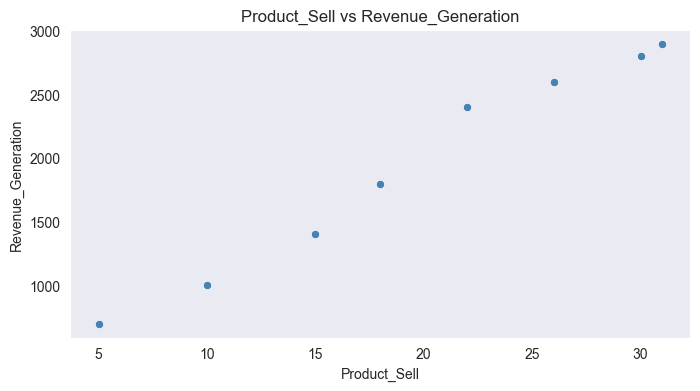

In [62]:
get_plot(df_sample_data, prediction_flag=False)

### Train Model From Scratch

- **Train Ordinary Least Squares Regression Model**

In [63]:
# Train Ordinary Least Squares Regression Model & Get its Coeffcients #####
df_train = df_sample_data.loc[:len(df_sample_data)-3]
slope, intercept = train_model(df_train)
print(f"Slope : {slope}")
print("intercept : {}".format(intercept))

Slope : 95.97024178549286
intercept : 64.60012399256061


- **Get Predictions**

In [64]:
# Get Predictions
predictions_list = get_predictions(slope, intercept, df_train["Product_Sell"].tolist())
df_train["Predictions"] = predictions_list

display(HTML(df_train.to_html()))

,Product_Sell,Revenue_Generation,Predictions
0,10,1000,1024.302542
1,15,1400,1504.153751
2,18,1800,1792.064476
3,22,2400,2175.945443
4,26,2600,2559.826410
5,30,2800,2943.707378


- **Product_Sell vs Revenue_Generation + Regression Plot**

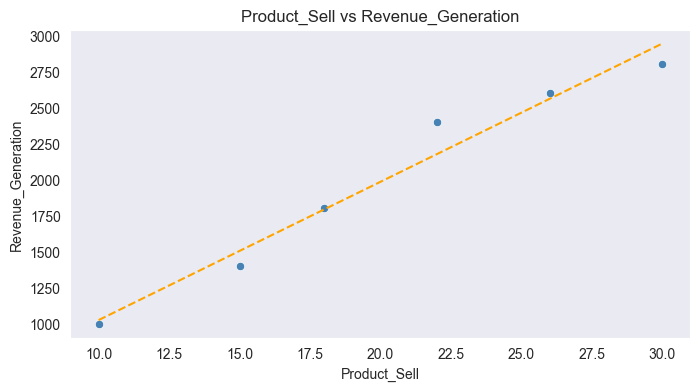

In [65]:
# Plot
get_plot(df_train, prediction_flag=True)

- **Predictions on Test Data**

In [66]:
# Predictions on unseen data #####
df_test = df_sample_data.loc[max(df_train.index.tolist())+1:]
predictions_list = get_predictions(slope, intercept, df_test["Product_Sell"].tolist())
# print("Revenue_Generation Predictions --> ", predictions_list)
df_test["Predictions"] = predictions_list

display(HTML(df_test.to_html()))

,Product_Sell,Revenue_Generation,Predictions
6,5,700,544.451333
7,31,2900,3039.677619


- **Actuals vs Predictions Plot[Test Data]**

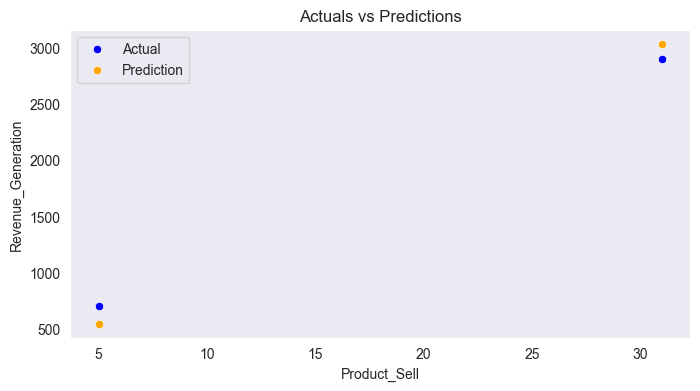

In [67]:
actuals_vs_prediction_plot(df_test)

- **Predictions on unseen data**

In [68]:
''' 
Product_Sell = [1, 20]
'''
predictions_list = get_predictions(slope, intercept, [1, 20])
print("Revenue_Generation Predictions --> ", predictions_list)

Revenue_Generation Predictions -->  [160.57036577805349, 1984.0049597024179]


- **`Model Performance Evaluation`**

- **RMSE Value**

In [69]:
rmse(df_test["Revenue_Generation"],df_test["Predictions"])

147.82629193692188

- `Observation`
  - Actual values are located 147.82 units away from the predicted values

- **R_Squared Value**

In [70]:
r_squared(df_test["Revenue_Generation"],df_test["Predictions"])

0.9819399895968429

- `Observation`
  - Model is able to observe 98.19% of the total variability of the data set.

### Train Model Using Sklearn

In [72]:
lm = LinearRegression()

X_train = np.array(df_train['Product_Sell']).reshape(-1, 1)
Y_train = np.array(df_train['Revenue_Generation']).reshape(-1, 1)

# Train Model
lm.fit(X_train, Y_train)
print("Coefficient --> ", lm.coef_)
print("Intercept --> ", lm.intercept_)

Coefficient -->  [[95.97024179]]
Intercept -->  [64.60012399]


- `Observation`
  - Above Sklearn Model Coefficient & Intercept are matching with our manually trained model parameters.

In [76]:
# Get Predictions on Test Data 
X_test = np.array(df_test["Product_Sell"]).reshape(-1, 1)
Y_pred = lm.predict(X_test)
df_test["Predictions"] = Y_pred

display(HTML(df_test.to_html()))

,Product_Sell,Revenue_Generation,Predictions
6,5,700,544.451333
7,31,2900,3039.677619


- **Actuals vs Predictions Plot[Test Data]**

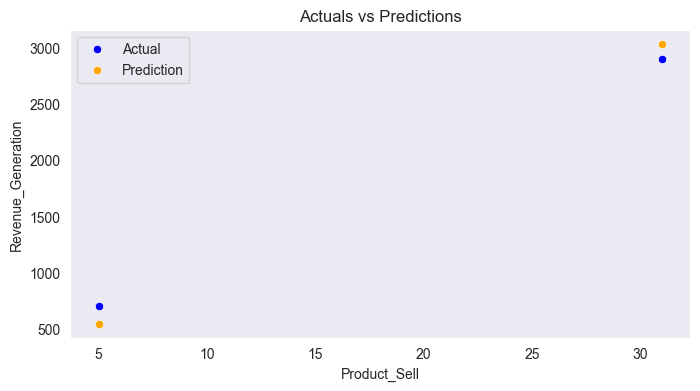

In [77]:
actuals_vs_prediction_plot(df_test)

- **Predictions on unseen data**

In [78]:
''' 
Product_Sell = [1, 20]
'''
df_unseen_data = np.array([1, 20]).reshape(-1, 1)
lm.predict(df_unseen_data)

array([[ 160.57036578],
       [1984.0049597 ]])

- **RMSE Value**

In [79]:
rmse(df_test["Revenue_Generation"],df_test["Predictions"])

147.8262919369221

- `Observation`
  - Actual values are located 147.82 units away from the predicted values

- **R_Squared Value**

In [80]:
r_squared(df_test["Revenue_Generation"],df_test["Predictions"])

0.9819399895968429

- `Observation`
  - As both Sklearn model & our manually trained model parameters are matching. So, both model's RMSE & R_Squared values are also matching.